<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/3_KFold_Cross_Validation_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.youtube.com/watch?v=gJo0uNL-5Qw&t=1244s ---> code basics

---------------------------

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

#### **Option 1**

##### **Use all availble data for training and test on same dataset**

#### **Option 2**

##### **Split available dataset into training and test sets**

#### **Option 3**

##### **K Fold Cross Validation**

---------------------

### **1) Split available dataset into training and test sets**

### **iteration 1**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

##### **Logistic Regression**

In [4]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.937037037037037

##### **SVM**

In [5]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4703703703703704

##### **Random Forest**

In [6]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9629629629629629

### **iteration 2**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

##### **Logistic Regression**

In [8]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9611111111111111

##### **SVM**

In [9]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.4759259259259259

##### **Random Forest**

In [10]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9555555555555556

- for **each iteration** of train_test_split **accuracy** will get **change** because of **change in random sample**.

### **2) KFold cross validation**

##### **Basic example**

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [12]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


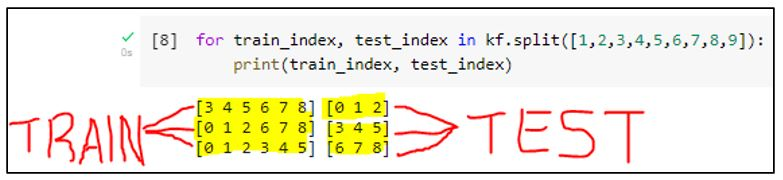

##### **Use KFold for our digits example**

In [13]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [14]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [15]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [16]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

In [17]:
scores_rf

[0.9215358931552587, 0.9565943238731218, 0.9232053422370617]

### **cross_val_score function**

- The above code can be replace with **cross_val_score**.

In [18]:
from sklearn.model_selection import cross_val_score

##### **Logistic regression model performance using cross_val_score**

In [19]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

##### **svm model performance using cross_val_score**

In [20]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

##### **random forest performance using cross_val_score**

In [21]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.93989983, 0.93656093, 0.92153589])

- cross_val_score uses stratifield kfold by default

#### **Parameter tunning using k fold cross validation**

In [27]:
cross_val_score(RandomForestClassifier(n_estimators=5), digits.data, digits.target, cv=3)

array([0.83973289, 0.86143573, 0.85308848])

In [22]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8803848541278709

In [23]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9315456238361266

In [24]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9465580384854126

In [25]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.945477963997517

- Here we used cross_val_score to fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result.